In [1]:
import pandas as pd 
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names 

# 0 - setosa, 1 - versicolor, 2 - virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df['Flower name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

### Creating 3 dataframe for 3 type of flowers

In [10]:
df1 = df[df.target == 0]
df2 = df[df.target == 1]
df3 = df[df.target == 2]

In [11]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
df3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


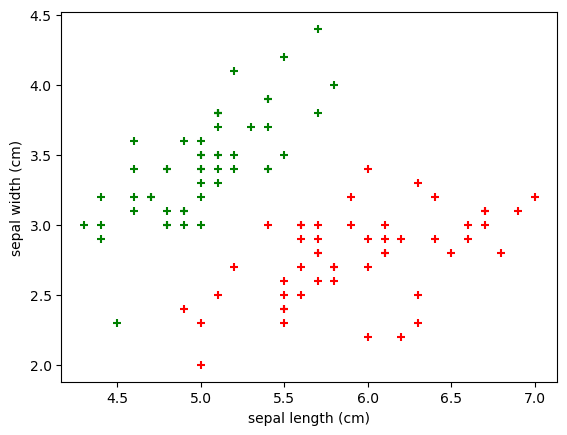

In [22]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'green', marker = '+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'red', marker = '+')
# plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color = 'blue', marker = '+')
plt.show()

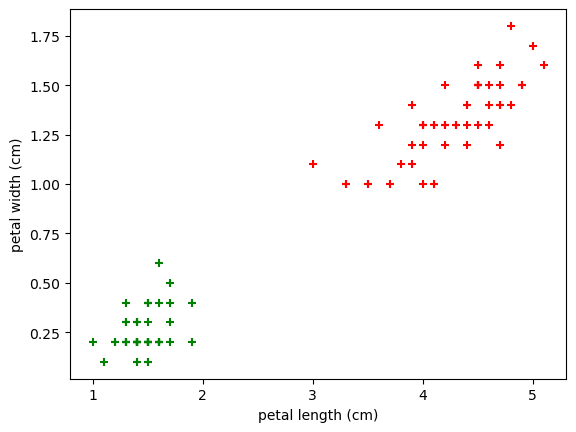

In [23]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green', marker = '+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'red', marker = '+')
# plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'blue', marker = '+')
plt.show()

In [24]:
## we will apply svm on petal as the difference is more

In [25]:
from sklearn.model_selection import train_test_split


In [34]:
X = df.drop(['target','Flower name'], axis='columns') # input feature is sepal,petal height,width
y = df.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40,stratify=y)

In [36]:
len(X_train)

120

In [37]:
len(X_test)

30

In [38]:
from sklearn.svm import SVC
model = SVC()

In [39]:
model.fit(X_train, y_train)

SVC()

In [40]:
model.score(X_test, y_test)

0.9666666666666667

## you can train paraments in SVM

1. Regularization

In [41]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

2. Gamma

In [42]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

3. Kernel

In [43]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
model_linear_kernal.score(X_test, y_test)

1.0